<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 7 Section 2</p><br>

## 1. **Working with datetime data;** The object `myDate` contains the date and time. Based on this object answer the following questions and type the answer after your findings.

In [2]:
myDate = '2022-10-01 09:42:43'

a. Convert `myDate` into a datetime object with Iran time zone. Display the result.

In [15]:
from datetime import datetime, timedelta,date
import pytz

In [5]:
myDate_=datetime.strptime(myDate,'%Y-%m-%d %H:%M:%S')   # Y should be capital
myDate_

datetime.datetime(2022, 10, 1, 9, 42, 43)

In [7]:
tehran_TimeZone=myDate_.astimezone(pytz.timezone('Asia/Tehran'))
tehran_TimeZone

datetime.datetime(2022, 10, 1, 9, 42, 43, tzinfo=<DstTzInfo 'Asia/Tehran' +0330+3:30:00 STD>)

b. Write your codes so that it displays the week day and also the month of `myDate`.

In [12]:
myDate_.strftime("Day:%d Month:%m")

'Day:01 Month:10'

c. What weekday and the month is it after exactly 100 years from `myDate`?

In [18]:
from dateutil.relativedelta import relativedelta
centAns=myDate_+relativedelta(years=100)
centAns

datetime.datetime(2122, 10, 1, 9, 42, 43)

In [19]:
centAns.weekday()

3

d. Add two month with myDate and display the resulting date time.

In [20]:
myDate_+relativedelta(months=2)

datetime.datetime(2022, 12, 1, 9, 42, 43)

e. Suppose this homework is due on December 23, 2022 by 11.59PM. Compute and display how many seconds you got to complete this homework? Also compute the hours.

In [32]:
interval=datetime(2022, 12, 23, 23, 59, 0)-datetime.now()
interval.seconds

13692

In [61]:
interval.seconds/3600

3.8033333333333332

f. For the years `2021` & `2022`, count the number of weekends. Which year has the highest number of Weekends?

In [40]:
def allsundays(year):
    count=0
    d = date(year, 1, 1)                    # January 1st
    d += timedelta(days = 6 - d.weekday())  # First Sunday
    while d.year == year:
      count+=1
      d += timedelta(days = 7)
    return count
print("Number of sundays in 2022 :"+str(allsundays(2022)))
print("Number of sundays in 2021 :"+str(allsundays(2021)))

Number of sundays in 2022 :52
Number of sundays in 2021 :52


g. What is the month(MM) and day(DD) on the `305`th day of the current year?

In [54]:
d=datetime(datetime.now().year, 1, 1) + timedelta(305 - 1)
print("Month :"+str(d.month))
print("Day :"+str(d.day))

Month :11
Day :1


h. The Date `2022-10-20` is formatted `YYYY-MM-DD`, format it into `MM-DD-YYYY`

In [57]:
datetime(2022,10,20).strftime('%m-%d-%Y') 

'10-20-2022'

i. Find if the Date on the question above is the weekend or a weekday.

In [59]:
weekno = datetime(2022,10,20).weekday()

if weekno < 5:
    print("Weekday")
else:  # 5 Sat, 6 Sun
    print("Weekend")

Weekday


## 2. **Walmart Sales Analysis:** load and read the dataset `walmart_sales.csv` and `walmart_fuel_prices.csv`.

We will follow the following data description when working with the above 2 datasets:

 * `index:` index is a default value of count
 * `Store:` Store is represented in number ID(1,2,3,4,...)
 * `Dept:` Dept is Department in each Store represented in number ID (1,2,3,4,...)
 * `Date:` Date is in YYYY-MM-DD char format - *needs to be converted into Date data type*
 * `Weekly_Sales:` Sales of a given Dept in a given Store for the Date
 * `Temperature:` Average temperature on the Date at given Store region
 * `Fuel_Price:` Cost of the Fuel on the given Date at a given Store
 * `IsHoliday:` Is the given Date a holiday Week? 

In [66]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fuel_df=pd.read_csv('walmart_fuel_prices.csv', parse_dates=['Date'])
sales_df=pd.read_csv('walmart_sales.csv', parse_dates=['Date'])

In [3]:
fuel_df.head()

,index,Store,Date,Temperature,Fuel_Price,IsHoliday
0,1,1,2010-02-05,42.31,2.572,False
1,2,1,2010-02-12,38.51,2.548,True
2,3,1,2010-02-19,39.93,2.514,False
3,4,1,2010-02-26,46.63,2.561,False
4,5,1,2010-03-05,46.50,2.625,False


In [4]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


 a. For both datasets, breakdown the `Date` column and create additional new columns `Year`, `Month`, and `Day`. You should now have additional 3 new columns in your both dataset. Report only the column names for both the dataset.

In [5]:
fuel_df['Year'], fuel_df['Month'], fuel_df['Day']=fuel_df.Date.dt.year, fuel_df.Date.dt.month, fuel_df.Date.dt.day

In [6]:
fuel_df[['Year','Month','Day']]

,Year,Month,Day
0,2010,2,5
1,2010,2,12
2,2010,2,19
3,2010,2,26
4,2010,3,5
...,...,...,...
8185,2013,6,28
8186,2013,7,5
8187,2013,7,12
8188,2013,7,19


In [7]:
sales_df['Year'], sales_df['Month'], sales_df['Day']=sales_df.Date.dt.year, sales_df.Date.dt.month, sales_df.Date.dt.day

In [8]:
sales_df[['Year','Month','Day']]

,Year,Month,Day
0,2010,2,5
1,2010,2,12
2,2010,2,19
3,2010,2,26
4,2010,3,5
...,...,...,...
421565,2012,9,28
421566,2012,10,5
421567,2012,10,12
421568,2012,10,19


b. In `walmart_sales`: which `Month(s)` of `Year` have the highest `Weekly_Sales`? Report the Year, Month, Store, and Dept.

In [9]:
Max=sales_df.loc[sales_df["Weekly_Sales"].idxmax()]
print("Year: "+ str(Max.Year))
print("Month: "+ str(Max.Month))
print("Store: "+ str(Max.Store))
print("Dept: "+ str(Max.Dept))

Year: 2010
Month: 11
Store: 10
Dept: 72


c. In `walmart_sales`: calculate the average monthly sales by Department for each Store. Which Store(s) has the highest average monthly sales on the department(s)? Report the Store, Department, Date.

In [10]:
a=sales_df.groupby(['Dept','Store','Month']).agg(Average=('Weekly_Sales', 'mean')).reset_index()

In [11]:
sales_df.loc[a['Average'].idxmax()][['Store','Dept','Date']]

Store                      3
Dept                      80
Date     2011-12-02 00:00:00
Name: 27987, dtype: object

d. In `walmart_sales`: which month of year `2011` has the highest overall sales by Store? Name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. After that do the same for `2012`. Does the highest sales per month fall on the same holiday for both years? Report your findings for both year.

In [26]:
b=sales_df[sales_df['Year']==2011].groupby(['Month','Store']).agg(total_sale=('Weekly_Sales','sum')).reset_index()

In [27]:
b.loc[b['total_sale'].idxmax()][['Month']]

Month    12.0
Name: 514, dtype: float64

In [16]:
cal = USFederalHolidayCalendar()
for dt in cal.holidays(datetime(2011,12,1), datetime(2011,12,31)): 
    print (dt)

2011-12-26 00:00:00


In [17]:
f=sales_df[sales_df['Year']==2012].groupby(['Month','Store']).agg(total_sale=('Weekly_Sales','sum')).reset_index()

In [18]:
f.loc[f['total_sale'].idxmax()][['Month']]

Month    6.0
Name: 228, dtype: float64

In [19]:
cal = USFederalHolidayCalendar()
for dt in cal.holidays(datetime(2012,12,1), datetime(2012,12,31)): 
    print (dt)

2012-12-25 00:00:00


In [23]:
sales_df[sales_df['Date']=='2012-12-25']

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Day


In [24]:
sales_df[sales_df['Date']=='2011-12-26']

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Day


In [25]:
# No Sales in these Dates

 e. In `walmart_sales`: report the lowest sales per month for the year `2011` for `IsHoliday == TRUE`. Name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. Do the same for `2012` and report if the lowest sales are on the same month.

In [33]:
b=sales_df[(sales_df['Year']==2011) & (sales_df['IsHoliday']==True)].groupby(['Month']).agg(total_sale=('Weekly_Sales','sum')).reset_index()

In [34]:
b.loc[b['total_sale'].idxmin()][['Month']]

Month    12.0
Name: 3, dtype: float64

In [35]:
b=sales_df[(sales_df['Year']==2012) & (sales_df['IsHoliday']==True)].groupby(['Month']).agg(total_sale=('Weekly_Sales','sum')).reset_index()

In [36]:
b.loc[b['total_sale'].idxmin()][['Month']]

Month    9.0
Name: 1, dtype: float64

In [38]:
cal = USFederalHolidayCalendar()
for dt in cal.holidays(datetime(2012,9,1), datetime(2012,9,30)): 
    print (dt)

2012-09-03 00:00:00


In [39]:
sales_df[sales_df['Date']=='2012-09-03']

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Day


In [42]:
# No Sales in these Dates

f. In `walmart_sales`: We have 45 unique stores. Generate a nice plot on the total sales by store for the year `2012`. Report the Store number.

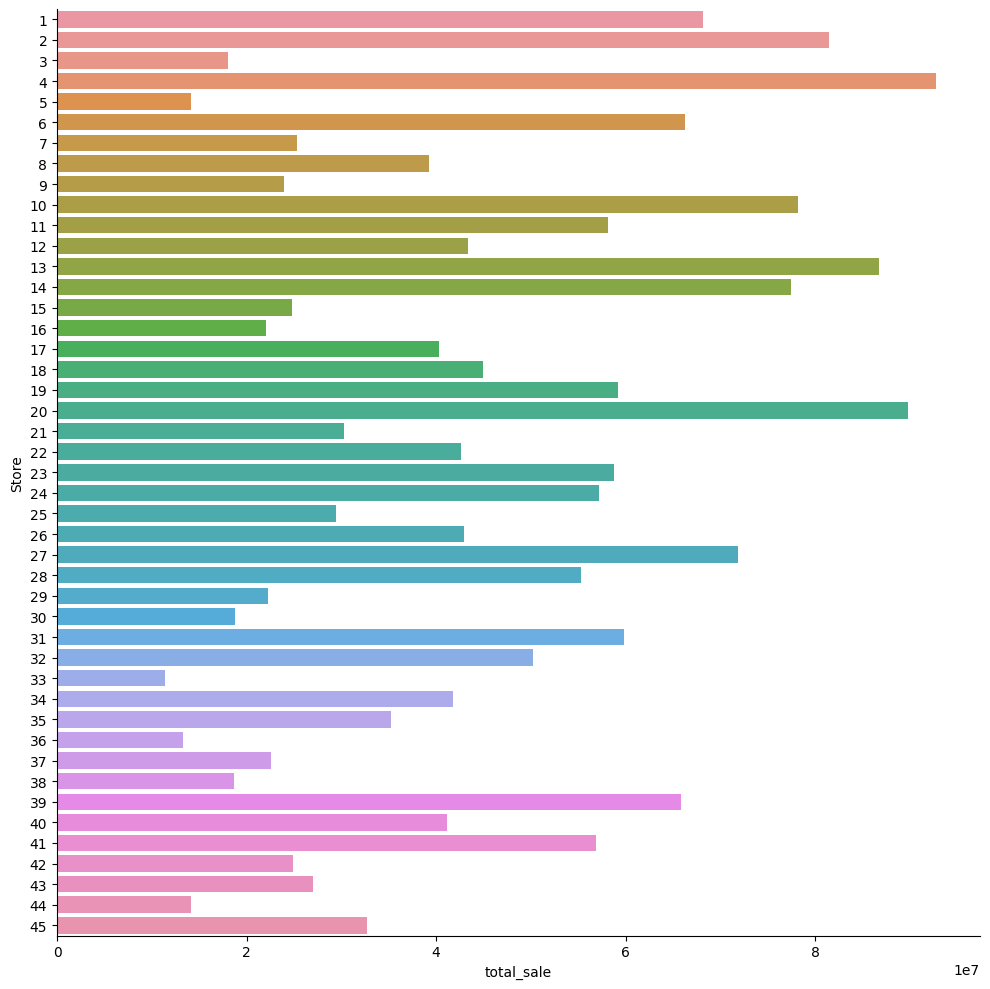

In [59]:
f=sales_df[sales_df['Year']==2012].groupby(['Store']).agg(total_sale=('Weekly_Sales','sum')).reset_index()
sns.catplot(data=f,y='Store',x='total_sale', kind='bar',orient = 'h', height=10)

g. In `walmart_fuel_prices`: For the year `2011` do you think higher the `temperature` relates to higher `fuel price`? Support your answer with a nice plot.

In [61]:
fuel_df.head()

,index,Store,Date,Temperature,Fuel_Price,IsHoliday,Year,Month,Day
0,1,1,2010-02-05,42.31,2.572,False,2010,2,5
1,2,1,2010-02-12,38.51,2.548,True,2010,2,12
2,3,1,2010-02-19,39.93,2.514,False,2010,2,19
3,4,1,2010-02-26,46.63,2.561,False,2010,2,26
4,5,1,2010-03-05,46.50,2.625,False,2010,3,5


In [91]:
e=fuel_df[fuel_df['Year']==2012].groupby('Month').agg(total_temp=('Temperature','sum')).reset_index()
f=fuel_df[fuel_df['Year']==2012].groupby('Month').agg(total_price=('Fuel_Price','sum')).reset_index()

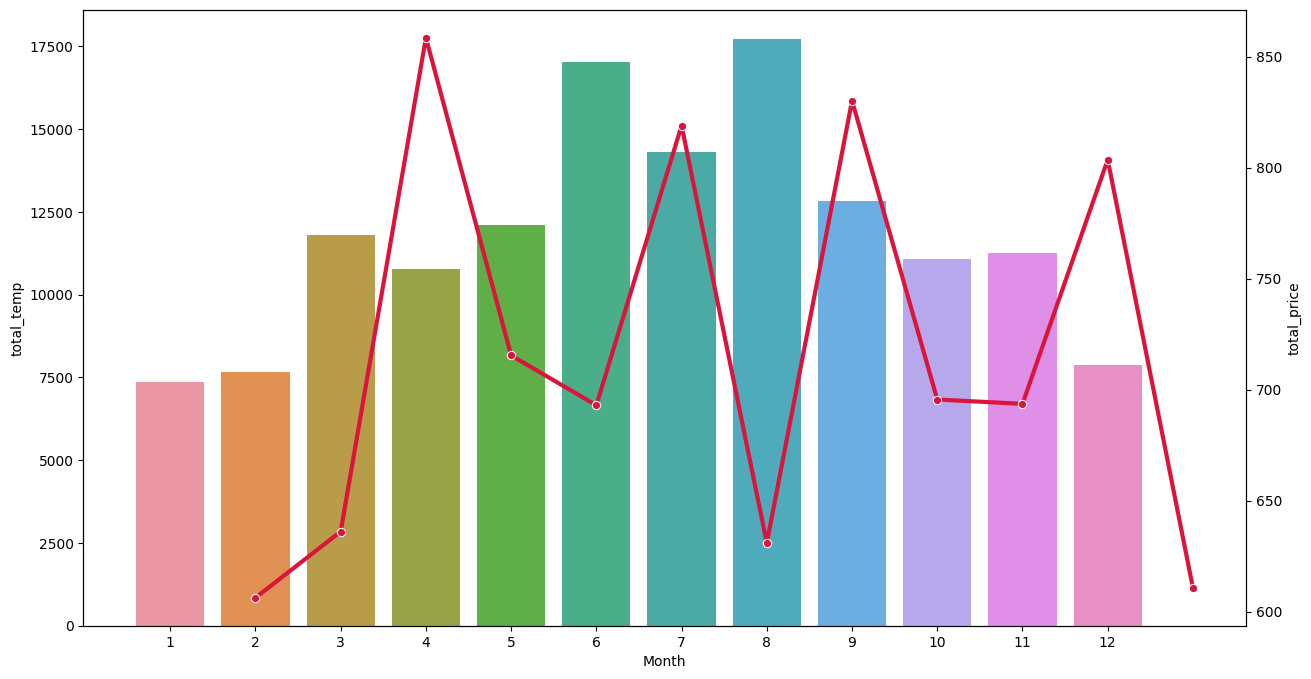

In [92]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Month', y='total_temp', data=e)

ax2 = ax.twinx()
sns.lineplot(x='Month', y='total_price', data=f, marker='o', color='crimson', lw=3, ax=ax2)

plt.show()

 h. In `walmart_fuel_prices`: For the year `2010` which `Store` had the lowest Fuel Price? Report the `month` and `temperature`. On the same `month`, what was the highest fuel price for the store? Report the difference.

In [116]:
min_price_idx=fuel_df[fuel_df['Year']==2010]['Fuel_Price'].idxmin()
fuel_df.loc[min_price_idx][['Store','Month','Temperature']]

Store             36
Month              2
Temperature    45.66
Name: 6372, dtype: object

In [114]:
max_price_idx=fuel_df[(fuel_df['Year']==2010) & (fuel_df['Month']==2)]['Fuel_Price'].idxmax()
fuel_df.loc[max_price_idx][['Store','Month','Temperature']]

Store             10
Month              2
Temperature    54.34
Name: 1638, dtype: object

In [117]:
-fuel_df.loc[min_price_idx][['Store','Month','Temperature']].Temperature+fuel_df.loc[max_price_idx][['Store','Month','Temperature']].Temperature

8.680000000000007

i. In `walmart_fuel_prices`: For the `IsHoliday == TRUE`, which month has the lowest `Fuel Price` for the year `2012`? name the holiday(Labor day, July 4th, Halloween, Thanksgiving, Christmas,... etcs) that falls on the month. Also report month of the highest fuel price and name of the holiday.

In [119]:
min_price_idx=fuel_df[(fuel_df['Year']==2012) & (fuel_df['IsHoliday']==True)]['Fuel_Price'].idxmin()
fuel_df.loc[min_price_idx]['Month']

2

In [120]:
max_price_idx=fuel_df[(fuel_df['Year']==2012) & (fuel_df['IsHoliday']==True)]['Fuel_Price'].idxmax()
fuel_df.loc[max_price_idx]['Month']

9

## 3. **COVID19 Time Series Data:**

<br/>
Download the data from
<a target='_blank' href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv">[github link]</a>
(https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv) 

<br/>
<br/>
The link above contains a time-series data for COVID-19 confirmed cases in the US. Limit the data to only use `New York State` and please answer the following questions:



a. What is the total confirmed cases in Nebraska as of October 30th 2020 as per the dataset?


In [247]:
covid=pd.read_csv('time_series_covid19_confirmed_US.csv')

In [158]:
# covid=covid[covid['Province_State']=='New York']
# covid.head()

In [248]:
covid=covid.drop(['UID','iso2','iso3','code3','FIPS','Admin2','Country_Region','Lat','Long_','Combined_Key'],axis=1)

In [160]:
covid

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/13/22,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22
0,Alabama,0,0,0,0,0,0,0,0,0,...,18752,18847,18847,18847,18847,18847,18847,18847,18961,18961
1,Alabama,0,0,0,0,0,0,0,0,0,...,66951,67221,67221,67221,67221,67221,67221,67221,67496,67496
2,Alabama,0,0,0,0,0,0,0,0,0,...,6989,7007,7007,7007,7007,7007,7007,7007,7027,7027
3,Alabama,0,0,0,0,0,0,0,0,0,...,7653,7668,7668,7668,7668,7668,7668,7668,7692,7692
4,Alabama,0,0,0,0,0,0,0,0,0,...,17559,17648,17648,17648,17648,17648,17648,17648,17731,17731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,Wyoming,0,0,0,0,0,0,0,0,0,...,11968,11968,11968,11968,11968,11968,11968,11997,11997,11997
3338,Wyoming,0,0,0,0,0,0,0,0,0,...,6287,6287,6287,6287,6287,6287,6287,6303,6303,6303
3339,Wyoming,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3340,Wyoming,0,0,0,0,0,0,0,0,0,...,2717,2717,2717,2717,2717,2717,2717,2717,2717,2717


In [249]:
covid=covid.melt(id_vars=["Province_State"], var_name="Date", value_name="Value")
covid

,Province_State,Date,Value
0,Alabama,1/22/20,0
1,Alabama,1/22/20,0
2,Alabama,1/22/20,0
3,Alabama,1/22/20,0
4,Alabama,1/22/20,0
...,...,...,...
3562567,Wyoming,12/22/22,11997
3562568,Wyoming,12/22/22,6303
3562569,Wyoming,12/22/22,0
3562570,Wyoming,12/22/22,2717


In [250]:
covid['Date']=pd.to_datetime(covid['Date'])

In [174]:
# total confirmed cases in Nebraska as of October 30th 2020 as per the dataset?
covid[(covid['Province_State']=='Nebraska') & (covid['Date']=='10/30/2020')].Value.sum()

69645

b. On what date has the highest confirmed cases? Demonstrate using a suitable graph for all the available data.


C:\Users\Asus\AppData\Local\Temp\ipykernel_9708\2567363838.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


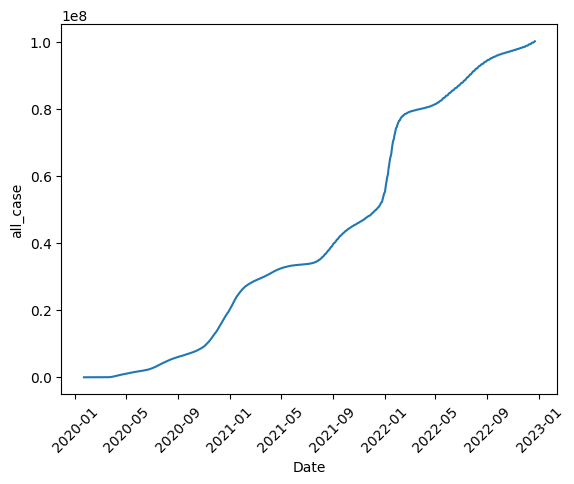

In [253]:
e=covid.groupby('Date').agg(all_case=('Value','sum')).reset_index()
chart=sns.lineplot(data=e, x='Date',y='all_case')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

c. Which County has the highest daily confirmed cases? Report both the County name and the date


In [193]:
f=covid.groupby(['Province_State','Date']).agg(all_case=('Value','sum')).reset_index()
f.loc[f['all_case'].idxmax()][['Province_State','Date']]

Province_State             California
Date              2022-12-22 00:00:00
Name: 6395, dtype: object

d. Identify two countries that have top total confirmed cases. Generate a time series plot of daily confirm cases for these two countries.


In [232]:
g=covid.groupby(['Province_State']).agg(all_case=('Value','sum')).reset_index()
h=g.loc[g['all_case'].nlargest(2).index]


In [246]:
l=covid[covid['Province_State']=='California']
# l.groupby('Date').agg(val=('Value','sum')).reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


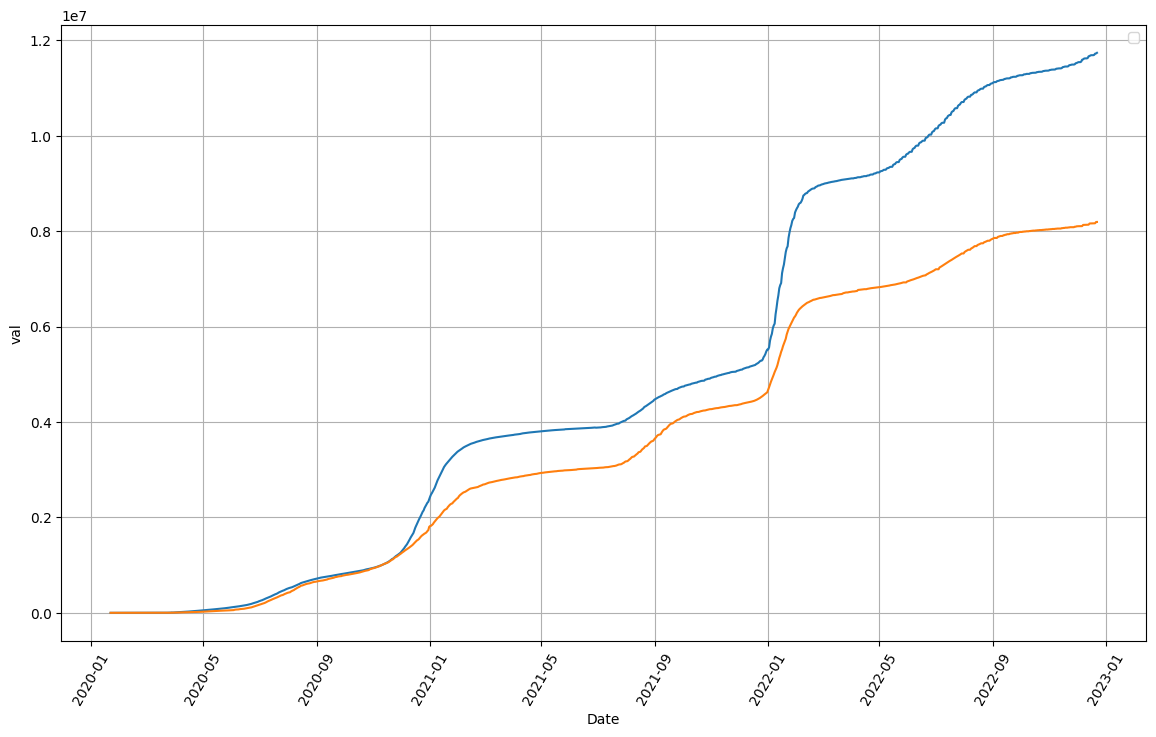

In [239]:
plt.figure(figsize=(14,8))

l=covid[covid['Province_State']==h.iloc[0]['Province_State']]
l=l.groupby('Date').agg(val=('Value','sum')).reset_index()
sns.lineplot(data=l, x=l['Date'], y=l['val'])


l=covid[covid['Province_State']==h.iloc[1]['Province_State']]
l=l.groupby('Date').agg(val=('Value','sum')).reset_index()
sns.lineplot(data=l, x=l['Date'], y=l['val'])


plt.xticks(rotation = 60)
plt.legend()
plt.grid()

e. Show the total confirmed cases for all the locations in an interactive world map (hint: you may use `leaflet` package in `python`.


In [ ]:
# TODO